In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Figures demonstrating the speedup achieved for the image blurring function when executed in parallel.

In this example, two figures were used. A relatively small one of $500 \times 300$ pixels and a larger one with $3000 \times 3000$. Splitting of the image occurred along the y-axis.

The program was run on 1, 2, 4, 8, 16, 32 and 48 processes (the node had 48 processes, so avoided any interconnect).

## Function Timings

Speed up and efficiency of the actual image blurring function. The program was run 10 times and the average taken for 1, 2, 4, 8, 16, 32 and 48 processes.

n.b. The image bluring time on the larger image was around 8 minutes in serial, making it difficult to re-execute the script more than 10 times. For consistency, this was only 10 repeats were made for this smaller image.

In [28]:
# load the data files using pandas
# small image
datafile = 'ngcm_halo_small.csv'
df = pd.read_csv(datafile, header=None, names=['Size','Iterations','Total','Ave'])

# large image
datafileL = 'ngcm_halo_large.csv'
dfL = pd.read_csv(datafileL, header=None, names=['Size','Iterations','Total','Ave'])

In [33]:
iterations = 10
iteration_values = df['Iterations'] == iterations

# Small image
# array containing number of processes in each 
sizes = df['Size'][iteration_values].values
# Average times over 10 iterations when run with the different number of processes.
times = df['Ave'][iteration_values].values

# Calculate speed up and efficiency
speedup = times[0]/times
efficiency = speedup / sizes

# Large image
timesL = dfL['Ave'][iteration_values].values

speedupL = timesL[0]/timesL
efficiencyL = speedupL / sizes

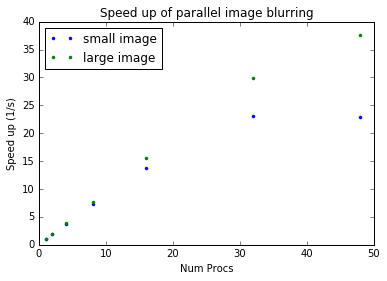

In [34]:
plt.plot(sizes, speedup, '.', label='small image')
plt.plot(sizes, speedupL, '.', label='large image')
plt.xlabel('Num Procs')
plt.ylabel('Speed up (1/s)')
plt.title('Speed up of parallel image blurring')
plt.legend(loc='upper left')
plt.show()

The above plot shows the speed up. Increasing number of processes is beneficial. However above increasing number of processes above 32 sees a slight decrease in speed for the smaller image. This is due to the size of the image.

The plot below shows the efficiency, which gradually decreases as the number of processes increases. The blurring of the larger image was significantly better.

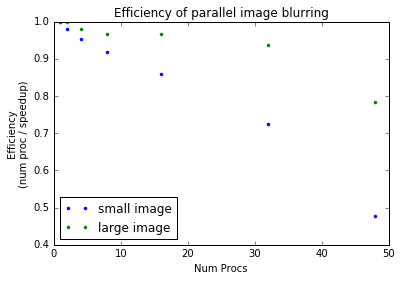

In [38]:
plt.plot(sizes, efficiency, '.', label='small image')
plt.plot(sizes, efficiencyL, '.', label='large image')
plt.xlabel('Num Procs')
plt.ylabel('Efficiency\n(num proc / speedup)')
plt.title('Efficiency of parallel image blurring')
plt.legend(loc='lower left')
plt.show()

## Scatterv Timings

The following graphs show the average times required to scatter the image from process 0 to all the other processes.

Only 10 repeats done: should do more for improve accuracy.


In [59]:
datafile = 'ngcm_halo_small_scatter.csv'
df = pd.read_csv(datafile, header=None, names=['Size','Total'])

grouped_df = df.groupby('Size')

# large image
datafileL = 'ngcm_halo_large_scatter.csv'
dfL = pd.read_csv(datafileL, header=None, names=['Size','Total'])

grouped_dfL = dfL.groupby('Size')

In [60]:
sizes = df['Size'][0:7].values
times = grouped_df.mean().values[:,0]

timesL = grouped_dfL.mean().values[:,0]

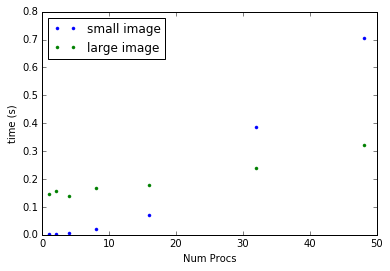

In [66]:
plt.plot(sizes, times, '.', label='small image')
plt.plot(sizes, timesL, 'g.', label='large image')
plt.xlabel('Num Procs')
plt.xlabel('Num Procs')
plt.ylabel('time (s)')
plt.legend(loc='upper left')
plt.show()

The above shows the average time to scatter the image.

The below plot shows the average time per process to scatter the image.

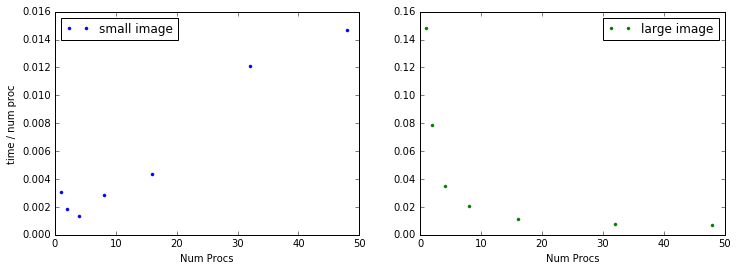

In [67]:
f, ((ax0), (ax1))= plt.subplots(1, 2, figsize=(12, 4))

ax0.plot(sizes, times/sizes, '.', label='small image')
ax1.plot(sizes, timesL/sizes, 'g.', label='large image')
ax0.legend(loc='upper left')
ax1.legend()
ax0.set_xlabel('Num Procs')
ax1.set_xlabel('Num Procs')
ax0.set_ylabel('time / num proc')
plt.show()

## Gatherv Times

Plots to demostrate the times required to gather the data onto a single process after the image blurring has been performed.

Only 10 repeats done. Should repeat more to improve accuracy.

In [78]:
datafile = 'ngcm_halo_small_gather.csv'
df = pd.read_csv(datafile, header=None, names=['Size','Total'])

grouped_df = df.groupby('Size')

datafileL = 'ngcm_halo_large_gather.csv'
dfL = pd.read_csv(datafileL, header=None, names=['Size','Total'])

grouped_dfL = dfL.groupby('Size')

In [79]:
sizes = df['Size'][0:7].values

times = grouped_df.mean().values[:,0]

timesL = grouped_dfL.mean().values[:,0]

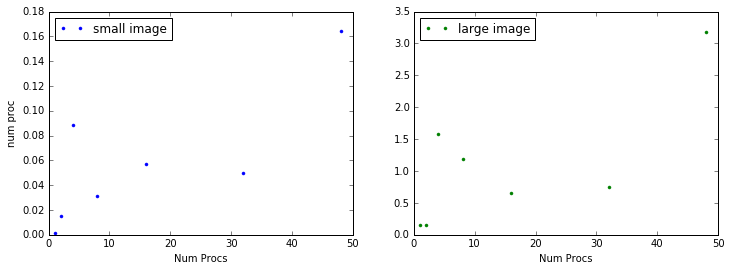

In [80]:
f, ((ax0), (ax1))= plt.subplots(1, 2, figsize=(12, 4))

ax0.plot(sizes, times, '.', label='small image')
ax1.plot(sizes, timesL, 'g.', label='large image')
ax0.legend(loc='upper left')
ax1.legend(loc='upper left')
ax0.set_xlabel('Num Procs')
ax1.set_xlabel('Num Procs')
ax0.set_ylabel('num proc')
plt.show()

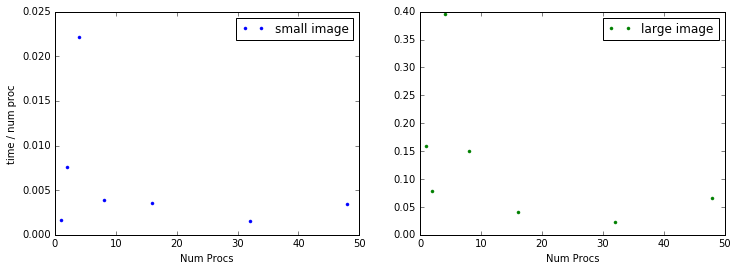

In [81]:
f, ((ax0), (ax1))= plt.subplots(1, 2, figsize=(12, 4))

ax0.plot(sizes, times/sizes, '.', label='small image')
ax1.plot(sizes, timesL/sizes, 'g.', label='large image')
ax0.legend()
ax1.legend()
ax0.set_xlabel('Num Procs')
ax1.set_xlabel('Num Procs')
ax0.set_ylabel('time / num proc')
plt.show()

## Halo vs. my method

Couple of plots to show the time differences to 

In [82]:
datafile = 'halo_times.csv'
df = pd.read_csv(datafile, header=None, names=['Size','Iterations', 'Halo', 'Me'])

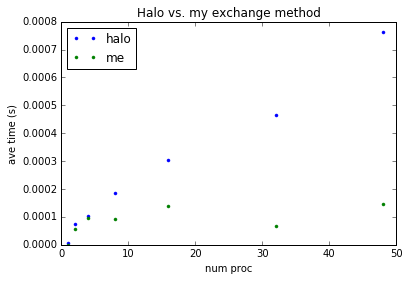

In [83]:
sizes = df['Size'].values
halo = df['Halo'].values
me = df['Me'].values

plt.plot(sizes, halo, '.', label='halo')
plt.plot(sizes, me, '.', label='me')
plt.ylabel('ave time (s)')
plt.xlabel('num proc')
plt.title('Halo vs. my exchange method')
plt.legend(loc='upper left')
plt.show()